In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from gurobipy import *
from random import sample
import numpy as np

plt.rcParams['figure.figsize'] = [10, 10] ## set the size of all figures

# Question 5.a

# Method 1: nx.shortest_path

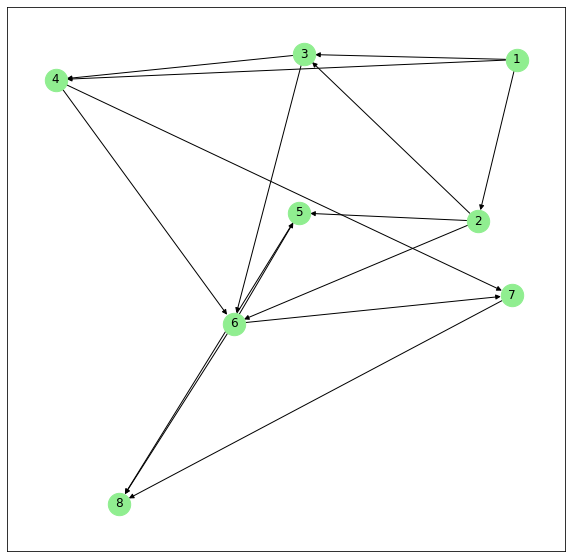

In [2]:
G=nx.DiGraph()

G.add_edge( 1,  2, weight= 8)
G.add_edge( 1,  3, weight= 7)
G.add_edge( 1,  4, weight= 4)
G.add_edge( 2,  3, weight= 2)
G.add_edge( 3,  4, weight= 5)
G.add_edge( 2,  6, weight= 9)
G.add_edge( 3,  6, weight= 6)
G.add_edge( 4,  6, weight= 1)
G.add_edge( 2,  5, weight= 3)
G.add_edge( 4,  7, weight= 2)
G.add_edge( 6,  5, weight= 3)
G.add_edge( 6,  7, weight= 4)
G.add_edge( 5,  8, weight= 9)
G.add_edge( 6,  8, weight= 5)
G.add_edge( 7,  8, weight= 8)

## We can also plot the graph.
nx.draw_networkx(G, with_labels=True, node_size=500, node_color='lightgreen')

In [3]:
length, path = nx.bidirectional_dijkstra(G, 1, 8)
print("The shortest cost is: {}.".format(length))
print("The shortest path is: {}.".format(path))

The shortest cost is: 10.
The shortest path is: [1, 4, 6, 8].


# Method 2: LP_1

In [4]:
model_5a=Model("question5.a_LP")

Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-30


In [5]:
## define variables at each edges: x[i,j]
x={}
for (i,j,d) in G.edges(data=True):
    x[i,j]=model_5a.addVar(vtype=GRB.BINARY, obj=d['weight'], name='x('+str(i)+','+str(j)+')') ## give 1 or 0 only

In [6]:
## Define source, terminal, weight
source = 1
terminal = 8

## Define a input and output flow at edge node
inc={}
out={}
for i in G.nodes():
    inc[i]=0 ## define the start value is 0
    out[i]=0 ## define the end value is 0
    
for (i,j) in G.edges():
    inc[j]+=x[i,j] ## the output flow of the previous nodes combination is the input flow of the node
    out[i]+=x[i,j] ## the output flow of the node 
    

    
for i in G.nodes(): 
    if i==source:
        model_5a.addConstr(out[i]-inc[i]==1) ## the source node has a flow equals to 1 (only an input flow)
    elif i==terminal:
        model_5a.addConstr(out[i]-inc[i]==-1) ## the terminal node has a flow equals to -1 (only an output flow)
    else:
        model_5a.addConstr(out[i]-inc[i]==0) ## all nodes in the middle will have a balanced flow = 0

In [7]:
model_5a.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 8 rows, 15 columns and 30 nonzeros
Model fingerprint: 0x0c51122e
Variable types: 0 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 9e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 14.0000000
Presolve removed 8 rows and 15 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 10 14 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+01, best bound 1.000000000000e+01, gap 0.0000%


In [8]:
for (i,j,d) in G.edges(data=True):
    if x[i,j].X==1:
        print("(%s,%s): %2.1f"% (i,j,d['weight']))

(1,4): 4.0
(4,6): 1.0
(6,8): 5.0


# Question 5.b

In [17]:
model_5b=Model("question5.a_LP")

In [18]:
H=nx.DiGraph()

H.add_edge( 1,  2, weight= 15, prize = 15, cost = 2)
H.add_edge( 1,  3, weight= 20, prize = 20, cost = 5)
H.add_edge( 1,  4, weight= 25, prize = 25, cost = 3)
H.add_edge( 2,  3, weight= 20, prize = 20, cost = 4)
H.add_edge( 3,  4, weight= 20, prize = 20, cost = 5)
H.add_edge( 2,  5, weight=  5, prize =  5, cost = 7)
H.add_edge( 3,  5, weight= 10, prize = 10, cost = 5)
H.add_edge( 4,  5, weight= 15, prize = 15, cost = 2)

In [24]:
## define variables at each edges: x[i,j]
x={}
for (i,j,d) in H.edges(data=True):
    x[i,j]=model_5b.addVar(vtype=GRB.BINARY, obj=d['weight'], name='x('+str(i)+','+str(j)+')') 

In [25]:
## Define source, terminal, weight
source = 1
terminal = 5

## Define a input and output flow at edge node
inc={}
out={}
for i in H.nodes():
    inc[i]=0 ## define the start value is 0
    out[i]=0 ## define the end value is 0
    
for (i,j) in H.edges():
    inc[j]+=x[i,j] ## the output flow of the previous nodes combination is the input flow of the node
    out[i]+=x[i,j] ## the output flow of the node 
    

    
for i in H.nodes(): 
    if i==source:
        model_5b.addConstr(out[i]-inc[i]==1) ## the source node has a flow equals to 1 (only an input flow)
    elif i==terminal:
        model_5b.addConstr(out[i]-inc[i]==-1) ## the terminal node has a flow equals to -1 (only an output flow)
    else:
        model_5b.addConstr(out[i]-inc[i]==0) ## all nodes in the middle will have a balanced flow = 0

In [26]:
total_prizes = 50
total_costs = 20

constrain_prize =quicksum(x[i,j]*d["prize"] for (i,j,d) in H.edges(data = True))
constrain_costs =quicksum(x[i,j]*d["cost"] for (i,j,d) in H.edges(data = True))


model_5b.addConstr(constrain_prize >= total_prizes, name = "total_prizes")
model_5b.addConstr(constrain_costs <= total_costs, name = "total_costs")


model_5b.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 14 rows, 16 columns and 64 nonzeros
Model fingerprint: 0xb38985ec
Variable types: 0 continuous, 16 integer (16 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [5e+00, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]

MIP start from previous solve produced solution with objective 110 (0.00s)
Loaded MIP start from previous solve with objective 110

Presolve removed 14 rows and 16 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 110 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.100000000000e+02, best bound 1.100000000000e+02, gap 0.0000%


In [27]:
for (i,j,d) in H.edges(data=True):
    if x[i,j].X==1:
        print("(%s,%s): %2.1f"% (i,j,d['weight']))

(1,3): 20.0
(3,4): 20.0
(4,5): 15.0
